In [1]:
import sys
sys.path.append('/shellstrop1/feilongm/radmc3d-2.0-master/python/radmc3dPy') #edit to match your path

import radmc3dPy

im = radmc3dPy.image.readImage(fname='/data/feilongm/HD163296_radmc3d/image.out') #edit to match the path to the image
im.writeFits('testimage.fits', dpc=101., coord='17h56m21s -21d57m21s')

Fast (Fortran90) Mie-scattering module could not be imported. Falling back to the slower Python version.
Reading /data/feilongm/HD163296_radmc3d/image.out
testimage.fits already exists
Do you want to overwrite it (yes/no)?yes


In [2]:
from astropy.io import fits

HD163296_13CO_file = "/home/feilongm/testimage.fits"

HD163296_13COcube = fits.open(HD163296_13CO_file)[0]

header = HD163296_13COcube.header
print(header)

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -64 / array data type                                NAXIS   =                    3 / number of array dimensions                     NAXIS1  =                  512                                                  NAXIS2  =                  512                                                  NAXIS3  =                   81                                                  EXTEND  =                    T                                                  CRPIX1  =                256.5 /                                                CDELT1  = -6.4459570957095E-06                                                  CRVAL1  =             269.0875                                                  CUNIT1  = '     DEG'                                                            CTYPE1  = 'RA---SIN'                                                            CRPIX2  =                256.5          

In [3]:
import numpy as np
from numpy import array, newaxis
from astropy import units as u

print("Reference frequency:",header['CRVAL3'] * u.Hz)
print("Reference frequency channel:",header['CRPIX3'])
print("Frequency spacing:",header['CDELT3'] * u.Hz)
print("Number of different frequencies:",header['NAXIS3'])
print("Unit of frequency:",header['CUNIT3'])
RESTFRQ = 230.538 * 10**9 *u.Hz
print(RESTFRQ)

FrequencySpacing = header['CDELT3'] * u.Hz
ReferenceFrequency = header['CRVAL3'] * u.Hz
NumFreq = np.arange(start=1, stop=16, step=1)
RestFreq = RESTFRQ
c = 299792.458 * u.km / u.s

def FrequenciesOnDifferentChannals(FrequencySpacing, ReferenceFrequency, NumFreq):
    Freq = ReferenceFrequency + (NumFreq - 1) * FrequencySpacing
    return Freq

ResultReferenceFreq = FrequenciesOnDifferentChannals(FrequencySpacing, ReferenceFrequency, NumFreq)

print(ResultReferenceFreq)

def ConvertingUnits(ResultReferenceFreq, RestFreq):
    ConvertingUnits = c * (RestFreq - ResultReferenceFreq) / RestFreq
    return ConvertingUnits

resultVelocity = ConvertingUnits(ResultReferenceFreq, RestFreq)
print(resultVelocity)

Reference frequency: 230545689919.9385 Hz
Reference frequency channel: 1.0
Frequency spacing: -192248.0010681152 Hz
Number of different frequencies: 81
Unit of frequency:       HZ
230538000000.0 Hz
[2.30545690e+11 2.30545498e+11 2.30545305e+11 2.30545113e+11
 2.30544921e+11 2.30544729e+11 2.30544536e+11 2.30544344e+11
 2.30544152e+11 2.30543960e+11 2.30543767e+11 2.30543575e+11
 2.30543383e+11 2.30543191e+11 2.30542998e+11] Hz
[-10.          -9.75        -9.49999999  -9.24999999  -8.99999999
  -8.74999998  -8.49999998  -8.24999998  -7.99999997  -7.74999997
  -7.49999997  -7.24999996  -6.99999996  -6.74999996  -6.49999995] km / s


ValueError: x and y must have same first dimension, but have shapes (15,) and (81,)

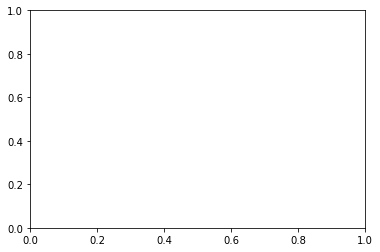

In [4]:
import matplotlib.pyplot as plt
data = HD163296_13COcube.data
spectrum = np.sum(data, axis=(1,2))
plt.plot(resultVelocity, spectrum)
plt.xlabel('velocity (km/s)')
plt.show()

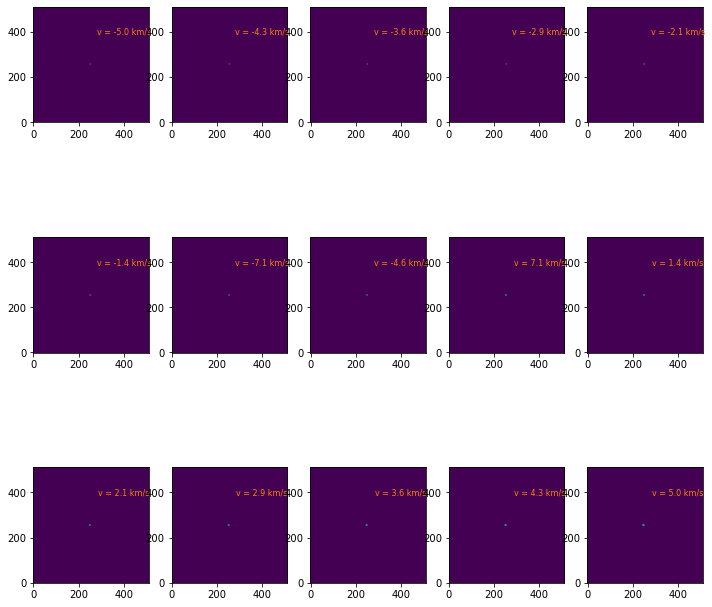

In [5]:
text_kwargs = dict(ha='center', va='center', fontsize=8, color='C1')
plt.figure(figsize = (12,12))
plt.subplot(3,5,1)
plt.imshow(data[0], origin='lower')
plt.text(400, 400, 'v = -5.0 km/s', **text_kwargs)
plt.subplot(3,5,2)
plt.imshow(data[1], origin='lower')
plt.text(400, 400, 'v = -4.3 km/s', **text_kwargs)
plt.subplot(3,5,3)
plt.imshow(data[2], origin='lower')
plt.text(400, 400, 'v = -3.6 km/s', **text_kwargs)
plt.subplot(3,5,4)
plt.imshow(data[3], origin='lower')
plt.text(400, 400, 'v = -2.9 km/s', **text_kwargs)
plt.subplot(3,5,5)
plt.imshow(data[4], origin='lower')
plt.text(400, 400, 'v = -2.1 km/s', **text_kwargs)
plt.subplot(3,5,6)
plt.imshow(data[5], origin='lower')
plt.text(400, 400, 'v = -1.4 km/s', **text_kwargs)
plt.subplot(3,5,7)
plt.imshow(data[6], origin='lower')
plt.text(400, 400, 'v = -7.1 km/s', **text_kwargs)
plt.subplot(3,5,8)
plt.imshow(data[7], origin='lower')
plt.text(400, 400, 'v = -4.6 km/s', **text_kwargs)
plt.subplot(3,5,9)
plt.imshow(data[8], origin='lower')
plt.text(400, 400, 'v = 7.1 km/s', **text_kwargs)
plt.subplot(3,5,10)
plt.imshow(data[9], origin='lower')
plt.text(400, 400, 'v = 1.4 km/s', **text_kwargs)
plt.subplot(3,5,11)
plt.imshow(data[10], origin='lower')
plt.text(400, 400, 'v = 2.1 km/s', **text_kwargs)
plt.subplot(3,5,12)
plt.imshow(data[11], origin='lower')
plt.text(400, 400, 'v = 2.9 km/s', **text_kwargs)
plt.subplot(3,5,13)
plt.imshow(data[12], origin='lower')
plt.text(400, 400, 'v = 3.6 km/s', **text_kwargs)
plt.subplot(3,5,14)
plt.imshow(data[13], origin='lower')
plt.text(400, 400, 'v = 4.3 km/s', **text_kwargs)
plt.subplot(3,5,15)
plt.imshow(data[14], origin='lower')
plt.text(400, 400, 'v = 5.0 km/s', **text_kwargs)
plt.show()

In [6]:
import sys
import os
import numpy as np
from scipy.interpolate import LinearNDInterpolator
import matplotlib.pyplot as plt
import matplotlib.colors as col

#add parameters

def setDirectories():
    if not os.path.exists('/data/feilongm/HD163296_radmc3d'):
        os.system('mkdir /data/feilongm/HD163296_radmc3d')
    os.chdir('/data/feilongm/HD163296_radmc3d')

def load_output():
    filename='/data/feilongm/rac-2d/rac-2d-master_2021/storage/HD_163296_COdep_t1e4_3/iter_0001.dat'
    output = np.loadtxt(filename, comments='!')
    with open(filename, 'r') as f:
        columnnames = f.readline().split()[1:]
        return dict(zip(np.array(columnnames), output.T))

#results = load_output(filename)

def saveFile(results):
    import radmc3dPy
    import radmc3dPy.natconst as nc
    rac2d_rvals = 0.5*(results['rmin']+results['rmax'])
    rac2d_zvals = 0.5*(results['zmin']+results['zmax'])
    rac2d_ngas = results['n_gas']
    rac2d_temp = results['Tgas']
    outputarray = np.stack((rac2d_rvals, rac2d_zvals, rac2d_ngas,rac2d_temp), axis=-1)
    np.savetxt('HD163296structure.txt',outputarray)
    sys.path.append('/shellstrop1/feilongm/radmc3d-2.0-master/python/radmc3dPy')

def setModelGrid(mstar_in, gasspec_vturb_in):
    import radmc3dPy.natconst as nc
    rvals = np.logspace(np.log10(0.01), np.log10(800),num=100)
    rvalstring='['
    for i in rvals:
        rvalstring+=('%0.2e' % i + "*au,")
    rvalstring=rvalstring[:-1]+']'
    model = radmc3dPy.setup.radmc3dModel(model='ppdisk', 
                                         mstar = [mstar_in], #custom mstar
                                         gasspec_vturb = gasspec_vturb_in, #custom gasspec_vturb
                                         binary=False)
    model.par.ppar['crd_sys']  = 'sph'
    model.makeGrid()
    model.grid.act_dim = [1,1,0]
    model.grid.nxi = 256
    model.grid.nyi = 65
    model.grid.nzi = 2
    model.grid.xi = np.logspace(np.log10(0.1*nc.au), np.log10(600*nc.au), num=model.grid.nxi)
    model.grid.yi = np.concatenate((np.linspace(0, np.pi/3, num=20)[:-1], np.linspace(np.pi/3., np.pi/2., num=model.grid.nyi+1-20) )) #in radians
    model.grid.zi = np.array([0,0]) 
    model.grid.nx = model.grid.nxi-1
    model.grid.ny = model.grid.nyi-1
    model.grid.nz = model.grid.nzi-1
    model.grid.x = (model.grid.xi[1:]+model.grid.xi[:-1])*0.5
    model.grid.y = (model.grid.yi[1:]+model.grid.yi[:-1])*0.5
    model.grid.z = np.array([0])
    model.grid.writeSpatialGrid()
    model.grid.writeWavelengthGrid()
    model.data = radmc3dPy.analyze.radmc3dData(model.grid)
    model.makeRadSources(writeToFile=True)
    model.makeVar(gvel=True, vturb=True, writeToFile=True)
    return model

def writeGasTemp(radmc3dpy_model, structurefile):
    import radmc3dPy.natconst as nc
    nx = radmc3dpy_model.data.grid.nx
    ny = radmc3dpy_model.data.grid.ny
    nz = radmc3dpy_model.data.grid.nz
    radmc3d_temp = np.zeros([nx, ny, nz])
    HD163296structure = np.loadtxt(structurefile)
    rac2d_r = HD163296structure[:,0]*nc.au 
    rac2d_z = HD163296structure[:,1]*nc.au 
    rac2d_temp =  HD163296structure[:,3] 
    
    rac2d_r = np.concatenate((rac2d_r, rac2d_r))
    rac2d_z = np.concatenate((rac2d_z, -1*rac2d_z))
    rac2d_temp =  np.concatenate((rac2d_temp, rac2d_temp))

    
    temp_interp = LinearNDInterpolator(list(zip(rac2d_r, rac2d_z)), rac2d_temp, fill_value=3.)
    
    
    for i in range(nx):
        for j in range(ny):
            for k in range(nz):
                r_cyl = radmc3dpy_model.data.grid.x[i]*np.sin(radmc3dpy_model.data.grid.y[j])
                z = np.abs(radmc3dpy_model.data.grid.x[i]*np.cos(radmc3dpy_model.data.grid.y[j]))
                tempval = temp_interp(r_cyl,z)
                if tempval>1.e5:
                    radmc3d_temp[i,j,k] = 99999.
                else:
                    radmc3d_temp[i,j,k] = temp_interp(r_cyl,z)
                
    radmc3dpy_model.data.gastemp = radmc3d_temp
    radmc3dpy_model.data.writeGasTemp(binary=False)

def writeCONumDens(radmc3dpy_model, structurefile, upperheight_in, lowerheight_in, molname, RAF):
    import radmc3dPy.natconst as nc
    nx = radmc3dpy_model.data.grid.nx
    ny = radmc3dpy_model.data.grid.ny
    nz = radmc3dpy_model.data.grid.nz
    radmc3d_CONumDens = np.zeros([nx, ny, nz])
    HD163296structure = np.loadtxt(structurefile)
    rac2d_r = HD163296structure[:,0]*nc.au 
    rac2d_z = HD163296structure[:,1]*nc.au 
    rac2d_ngas = HD163296structure[:,2] 
    
    rac2d_r = np.concatenate((rac2d_r, rac2d_r))
    rac2d_z = np.concatenate((rac2d_z, -1*rac2d_z))
    rac2d_ngas =  np.concatenate((rac2d_ngas, rac2d_ngas))
    
    logngasinterp = LinearNDInterpolator(list(zip(rac2d_r, rac2d_z)), np.log10(rac2d_ngas),fill_value=1.e-20)
    
    for i in range(nx):
        for j in range(ny):
            for k in range(nz):
                r_cyl = radmc3dpy_model.data.grid.x[i]*np.sin(radmc3dpy_model.data.grid.y[j])
                z = np.abs(radmc3dpy_model.data.grid.x[i]*np.cos(radmc3dpy_model.data.grid.y[j]))
                ngas = 10**logngasinterp(r_cyl,z)
                if lowerheight_in< z/r_cyl < upperheight_in:
                    radmc3d_CONumDens[i,j,k] = RAF*ngas
                else:
                    radmc3d_CONumDens[i,j,k] = 1.e-20
    radmc3dpy_model.data.ndens_mol = radmc3d_CONumDens
    radmc3dpy_model.data.writeGasDens(ispec=molname,binary=False)

def writeIn(upperheight_in, lowerheight_in, molname_in, model_in):
    import radmc3dPy.natconst as nc
    HD163296file = '/data/feilongm/HD163296_radmc3d/HD163296structure.txt' #change to appropriate path as needed
    writeGasTemp(model_in, HD163296file)
    writeCONumDens(model_in, HD163296file, upperheight_in, lowerheight_in, molname_in, RAF)

def copyDataAndWriteFile(molname, model_in):
    if molname == 'co':
        os.system('cp -v /shellstrop1/feilongm/radmc3d-2.0-master/python/radmc3dPy/python_examples/datafiles/molecule_co.inp .') # change to correct path
    elif molname == 'hcn':
        os.system('cp -v /home/feilongm/molecule_hcn.inp .')
    else :
        os.system('cp -v /home/feilongm/molecule_c2h.inp .')
    model_in.par.ppar['gasspec_mol_name'] = [molname]
    model_in.writeLinesInp()
    model_in.par.ppar['lines_mode']=1
    model_in.par.ppar['tgas_eq_tdust']=0
    model_in.writeRadmc3dInp()

def simulateImageCube(incl_in, widthkms_in, linenlam_in, iline_in):
    radmc3dPy.image.makeImage(npix=512.,
                          incl=incl_in,
                          phi=0.,
                          sizeau=1200.,
                          widthkms=widthkms_in,
                          linenlam=linenlam_in,
                          iline=iline_in) 
def plotImage():
    im = radmc3dPy.image.readImage(fname='image.out')
    radmc3dPy.image.plotImage(im, arcsec=True, dpc=101., ifreq=7)
    radmc3dPy.image.plotImage(im,arcsec=True, dpc=101., ifreq=4)
    radmc3dPy.image.plotImage(im,arcsec=True, dpc=101., ifreq=10)
    
def saveAsFits():
    im = radmc3dPy.image.readImage(fname='/data/feilongm/HD163296_radmc3d/image.out') #edit to match the path to the image
    im.writeFits('testimage.fits', dpc=101., coord='17h56m21s -21d57m21s')

Writing problem_params.inp
Writing amr_grid.inp
Writing wavelength_micron.inp
Writing stars.inp
-------------------------------------------------------------
Luminosities of radiation sources in the model :
Reading wavelength_micron.inp
As calculated from the input files :
Stars : 
  Star #0 + hotspot        : 3.564346e+33
Continuous starlike source : 0.000000e+00
 
-------------------------------------------------------------
Writing gas_velocity.inp
Writing microturbulence.inp
Writing gas_temperature.inp
Writing numberdens_co.inp
Writing lines.inp
Writing radmc3d.inp
Executing RADMC-3D Command:
radmc3d image npix 512 incl 46.7 sizeau 1200.0 widthkms 10 linenlam 81 phi 0.0 pointau 0.0  0.0  0.0 fluxcons iline 2
Reading image.out


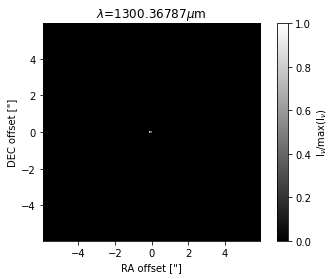

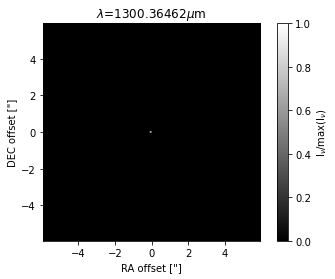

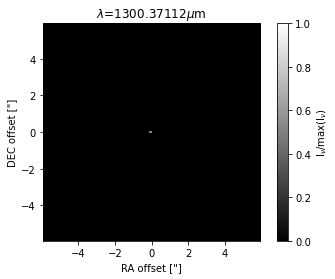

In [8]:
def RADMC3D(molname_in, iline_in, mstar_in, gasspec_vturb_in, lowerheight_in, upperheight_in, RAF, incl_in, widthkms_in, linenlam_in):
    setDirectories()
    results = load_output()
    saveFile(results)
    model_in = setModelGrid(mstar_in, gasspec_vturb_in)
    writeIn(upperheight_in, lowerheight_in, molname_in, model_in)
    copyDataAndWriteFile(molname_in, model_in)
    simulateImageCube(incl_in, widthkms_in, linenlam_in, iline_in)
    plotImage()
    #saveAsFits()

molname_in = 'co'
iline_in = 2
mstar_in = 4.e33
gasspec_vturb_in = 1.e4
upperheight_in = 0.25
lowerheight_in = 0.15
RAF = 1.e-5
incl_in = 46.7
widthkms_in = 10
linenlam_in = 81

RADMC3D(molname_in, iline_in, mstar_in, gasspec_vturb_in, lowerheight_in, upperheight_in, RAF, incl_in, widthkms_in, linenlam_in)